# Asymptotic Normality of MLE

## Asymptotic Normality of the MLE 

* Random variables $X_i \sim Ber(p)$
* MLE $\hat{p} = \bar{X_n}$
* Fisher Information $I(p) = \frac{1}{p(1-p)}$
* Sample size $n$

$$
\sqrt{n} (\hat{p_n} - p) \overset{d}{\to} N(0, \Sigma) \quad \text{as} \quad n\rightarrow \infty
$$

where $\Sigma = 1/I(p) = p(1-p) = \text{Var}(X_1) $

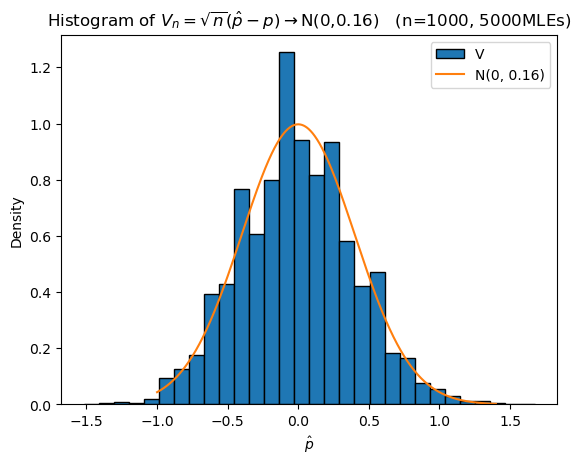

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters
p = 0.2
n = 1000

# Define the MLE function
def mle():
    sample = np.random.binomial(1, p, n)
    p_hat = sample.mean()
    return p_hat

# Collect MLE estimates
num_mle = 5000
p_hat_array = np.array([mle() for _ in range(num_mle)])

# Fisher Information (for Bernoulli)
I = 1 / (p * (1 - p))

# generate asymptotic normal
std_dev = np.sqrt(1/I)
mean = 0
x = np.linspace(-3*std_dev+p, 3*std_dev+p, 1000)
pdf = stats.norm.pdf(x, loc=mean, scale=std_dev)

# Plot histogram of MLE estimates
V = np.sqrt(n) * (p_hat_array-p) 
plt.hist(V, bins=30, density=True, edgecolor='black', align='mid', label='V')

# plot asymtotic normal
plt.plot(x, pdf, label=f'N({mean}, {(std_dev**2):.2f})')

# Title and labels
plt.title('Histogram of ' + '$V_n=\\sqrt{n}(\\hat{p}-p)\\rightarrow$' + f'N({mean},{std_dev**2:.2f})' + "$\\quad$" + f"(n={n}, {num_mle}MLEs)")
plt.xlabel('$\\hat{p}$')
plt.ylabel('Density')
plt.legend()
plt.show()


## Asymptotic Normality of the MLE (SE version)

$$
Z:=\frac{\hat{p_n} - p}{\hat{\text{SE}}(\hat{p_n})} \overset{d}{\to} N(0, 1) \quad \text{as} \quad n\rightarrow \infty
$$

where $\hat{\text{SE}}(\hat{p_n}) :=  \sqrt{\hat{p} (1-\hat{p})/n} \rightarrow \sqrt{p (1-p)/n} = \sqrt{1/(nI)}  $

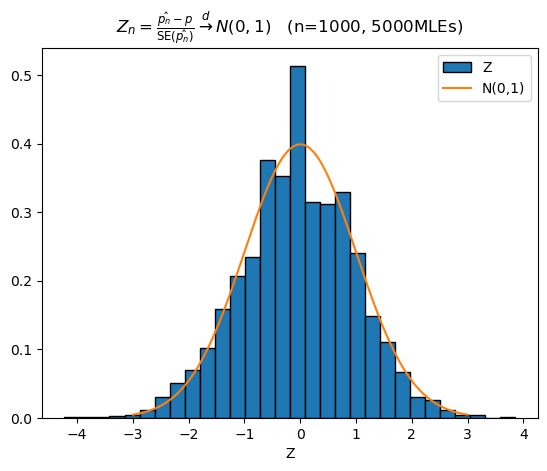

In [2]:
se_array = np.sqrt(p_hat_array * (1-p_hat_array)/n)
se = np.sqrt(1/(n*I))
z_array = (p_hat_array - p) / se_array
x = np.linspace(-3, 3, 1000)
pdf = stats.norm.pdf(x, loc=0, scale=1)
plt.hist(z_array, label="Z", bins=30, density=True, edgecolor='black', align='mid')
plt.plot(x, pdf, label="N(0,1)")
plt.title("$Z_n=\\frac{\\hat{p_n} - p}{\\text{SE}(\\hat{p_n})} \\overset{d}{\\to} N(0, 1) \\quad$" + f"(n={n}, {num_mle}MLEs)")
plt.xlabel("Z")
plt.legend()

### $\hat{SE}(\hat{p}) $ is about 0.0126

In [3]:
se_array # about 0.0126

array([0.01230463, 0.01276617, 0.0125774 , ..., 0.01260143, 0.0123554 ,
       0.01201561])

## Plot $\hat{p}$

$$
\hat{p_n} \rightarrow N(p, \frac{1}{nI(p)}) \quad \text{as} \quad n\rightarrow \infty
$$



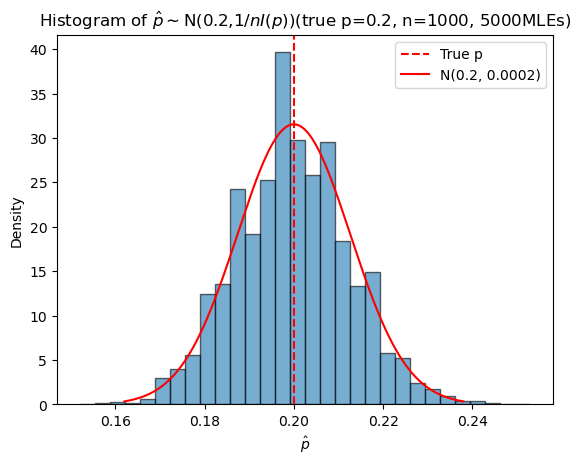

In [4]:
std_dev = np.sqrt(1 / (I * n)) 

# Generate points for the asymptotic normal PDF
x = np.linspace(-3 * std_dev + p, 3 * std_dev + p, 1000)
pdf = stats.norm.pdf(x, loc=p, scale=std_dev)

# Plot histogram of rescaled MLE estimates
plt.hist(p_hat_array, bins=30, density=True, edgecolor='black', align='mid', alpha=0.6)
plt.axvline(x=p, color='red', linestyle="--", label="True p")

# Plot asymptotic normal distribution
plt.plot(x, pdf, label=f'N({p}, {std_dev**2:.4f})', color='red')

# Title and labels
plt.title('Histogram of ' + '$\\hat{p}\\sim $' + f'N({p},' + '$1/nI(p))$' + f'(true p={p}, n={n}, {num_mle}MLEs)')
plt.xlabel('$\\hat{p}$')
plt.ylabel('Density')
plt.legend()
plt.show()


## Estimate $g(\hat{p})$
* Random variables $X_i \sim Ber(p)$
* MLE $\hat{p} = \bar{X_n}$
* Fisher Information $I(p) = \frac{1}{p(1-p)}$
* Sample size $n$
* $g(p) := \log(p)$

Estimate $g(\hat{p})$ using Delta method.

##  Delta method 

$$
\begin{aligned}
W_n & := \sqrt{n} \left( g(\hat{p}) - g(p) \right) \\
& = \sqrt{n} \left( \log(\hat{p}) - \log(p) \right) \\ 
& \overset{d}{\to} N\left(0, \Sigma\right) \quad \text{as} \quad n\rightarrow \infty \\
\end{aligned}
$$




where 
$$\Sigma = [g'(p)]^2  \text{Var}(X) = \frac{1}{p^2} p(1-p)=(1-p)/p$$

If $p=0.2, \Sigma =(1-0.2)/0.2=4$


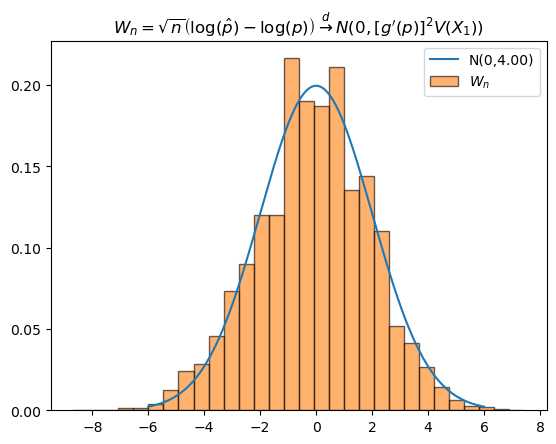

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# apply function g 
log_p_hat_array = np.log(p_hat_array)

# compute parameters and W
derivative = 1/p
avar_p_hat = p*(1-p)
avar_log = (derivative ** 2) * avar_p_hat
log_p = np.log(p)
std_dev = np.sqrt(avar_log)
W = np.sqrt(n) * (log_p_hat_array - log_p)

# Plot PDF
x = np.linspace(-3*std_dev, 3*std_dev, 1000)
pdf = stats.norm.pdf(x, loc=0, scale=std_dev)
plt.plot(x, pdf, label=f"N(0,{std_dev**2:.2f})")

# plot log(phat)
plt.hist(W, bins=30, density=True, edgecolor='black', align='mid', alpha=0.6, label="$W_n$")

# title
plt.title("$W_n =\\sqrt{n} \\left( \\log(\\hat{p}) - \\log(p) \\right) \\overset{d}{\\to} N(0, [g'(p)]^2 V(X_1))$")
plt.legend()

## Delta Method (SE version)

$$
Z_n := \left( \log(\hat{p}) - \log(p) \right)/SE[\log(\hat{p})] \overset{d}{\to} N(0, 1) \quad \text{as} \quad n\rightarrow \infty
$$

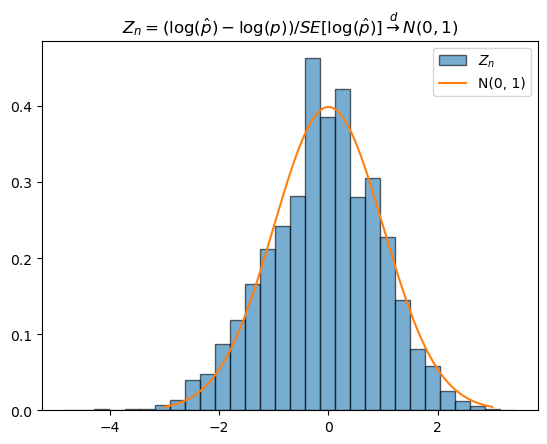

In [6]:
Z = (log_p_hat_array - log_p)/(se_array*derivative) 
x = np.linspace(-3, 3, 1000)
pdf = stats.norm.pdf(x, loc=0, scale=1)

# Plot Z
plt.hist(Z, bins=30, density=True, edgecolor='black', align='mid', alpha=0.6, label="$Z_n$")

# Plot Asymptotic Normal
plt.plot(x, pdf, label=f"N(0, 1)")

plt.title("$ Z_n=(\\log(\\hat{p}) - \\log(p))/SE[\\log(\\hat{p})] \\overset{d}{\\to} N(0, 1) $")
plt.legend()

log phat1 = -1.6820086052689358
Compute CI for log(p) using log(phat0)


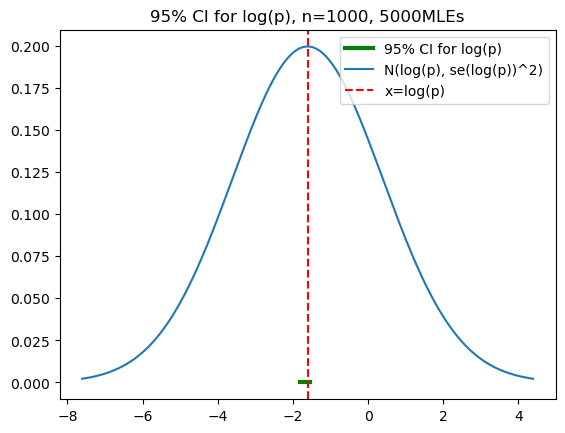

In [7]:
# CI for log(p)
print(f"log phat1 = {log_p_hat_array[0]}")
print("Compute CI for log(p) using log(phat0)")
alpha = 0.05
q = stats.norm.ppf(1-alpha/2)
se_log_p_hat = 1/p_hat_array[0] * se_array[0]
CI = [log_p_hat_array[0] - q*se_log_p_hat, log_p_hat_array[0] + q*se_log_p_hat]

# Plot 95% CI for log(p)
plt.plot(CI, [0.0, 0.0], linewidth=3, color='g', label="95% CI for log(p)")

#
se_log_p = np.sqrt(avar_log)
x = np.linspace(log_p -3*se_log_p, log_p +3*se_log_p, 1000)
pdf = stats.norm.pdf(x, loc=np.log(p), scale=se_log_p)
plt.plot(x, pdf, label="N(log(p), se(log(p))^2)")
plt.axvline(x=log_p, linestyle='--', color='r',label="x=log(p)")
plt.title(f"95% CI for log(p), n={n}, {num_mle}MLEs")
plt.legend(loc="upper right")
plt.show()

In [8]:
# Find out log(p) in a random CI with probability 95% 
num_success = 0
alpha = 0.05
for i in range(num_mle):
    q = stats.norm.ppf(1-alpha/2)
    se_log_p_hat = 1/p_hat_array[i] * se_array[i]
    CI = [log_p_hat_array[i] - q*se_log_p_hat, log_p_hat_array[i] + q*se_log_p_hat]
    if CI[0] < log_p and log_p < CI[1]:
        num_success += 1
print(f"{num_success/num_mle}")

0.948
